# Fifa Player Performance, Ranking and Salary Analysis

DS Project proposal by: <br>
Tsega Abebe (A0242543L) and Jakob Nunnendorf (A0242358A)

## About the data: <br>
Approach: <br>
For our project, we aim to perform exploratory data analysis (EDA) to tell a data-backed story about football. <br>
In the interest of accuracy we have chosen our dataset based on the following criteria: <br>
- High data quality
- Large data quantity
- Strong predictability
- Interesting context

We believe that the dataset FIFA World Cup Player Ratings from kaggle meets all of these criteria because the data originally stems from the EA Sports Fifa game series. EA Sports employs a combination of real-life data, professional scouting, and collaboration with clubs and players to obtain the data. For the purpose of this project we will take this to be the closest available representation of the real world.

We have 18,278 observations and 62 possibly relevant predictors.


# Research Question:
1. What are the strongest predictors of salary in the FIFA World Cup Player Ratings dataset, and how much of the variance in salary can be explained by these predictors?

2. How do the different skill attributes, such as dribbling, shooting, and passing, contribute to a player's overall rating in the FIFA World Cup Player Ratings dataset? Is there any skill attribute that stands out as a particularly strong predictor of overall rating?

3. How do the physical attributes, such as height and weight, and the skill attributes, such as dribbling, shooting, and passing, of players vary by nationality chosen randomly in the FIFA World Cup Player Ratings dataset? Are there any notable differences between players from different countries in terms of their physical and skill attributes?


To perform EDA and answer these research questions, we need to clearly understand the dataset's features, their distribution, and their correlation with the target variable.


# Importing Library

In [71]:
# Run this cell to set up your notebook
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data Set

In [72]:
df = pd.read_csv("players_20.csv")
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# Exploratory Data Analysis (EDA)

### First we analyse the dataset

### What are the dimensions of the dataset i.e. how many rows and how many columns?

In [73]:
print('Total Number of Rows: ',df.shape[0])
print('Total Number of Columns: ',df.shape[1])

Total Number of Rows:  18278
Total Number of Columns:  104


### What are the columns names and what might be interesting predictors?

In [74]:
print('Out of the following columns:')
print(list(df.columns))
predictor_columns = ['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
print(f'There are {len(predictor_columns)} interesting predictors')


Out of the following columns:
['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance

### Number of missing values in each column

In [75]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

### How many missing values for each predictor:

In [76]:
missing_values = df[predictor_columns].isnull().sum().sort_values(ascending=False)
missing_values

gk_positioning          16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
                        ...  
attacking_volleys           0
skill_dribbling             0
skill_curve                 0
skill_fk_accuracy           0
goalkeeping_reflexes        0
Length: 62, dtype: int64

It makes sense that non-goal keepers have no goal keeper values. It might be interesting to see how many values we have per position (goalie, defender, midfield, striker).

So first we see how many positions there are and sort them into the four categories.

In [77]:
unique_positions = df['player_positions'].unique()
# create containers for all four categories
goal_keeper_positions = []
defender_positions = []
midfielder_positions = []
striker_positions = []
for position in unique_positions:
  # filter all that can play goalie (just for sanity)
  if 'GK' in position:
    goal_keeper_positions.append(position)
  # filter all that can play as defenders
  if 'B' in position:
    defender_positions.append(position)
  # filter all that can play as midfielders
  if position[-1] == 'M' or position[-1] == 'W':
    midfielder_positions.append(position)
  # filter all that can play as strikers
  if 'ST' in position:
    striker_positions.append(position)
print("Total number of goalie's positions : {}".format(len(goal_keeper_positions)))
print("Total number of defender's positions: {}".format(len(defender_positions)))
print("Total number of midfielder's positions: {}".format(len(midfielder_positions)))
print("Total number of striker's positions: {}".format(len(striker_positions)))


Total number of goalie's positions : 1
Total number of defender's positions: 311
Total number of midfielder's positions: 387
Total number of striker's positions: 131


Find out how many data points we have per category:

In [78]:
# Create a dictionary to store the count of players in each category
player_count = {
    'Goalie': 0,
    'Defender': 0,
    'Midfielder': 0,
    'Striker': 0,
    'Sum': 0,
    'Unique': 0,
    'Rows': 0
}

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    player_count['Rows'] += 1
    positions = row['player_positions']
    # Check if the player has a position in any of the categories
    if positions in goal_keeper_positions:
        player_count['Goalie'] += 1
    if positions in defender_positions:
        player_count['Defender'] += 1
    if positions in midfielder_positions:
        player_count['Midfielder'] += 1
    if positions in striker_positions:
        player_count['Striker'] += 1
    if positions in unique_positions:
        player_count['Unique'] += 1
    player_count['Sum'] = player_count['Goalie'] + player_count['Defender'] + player_count['Midfielder'] + player_count['Striker']

# Print the counts of players in each category
for category, count in player_count.items():
    print(f"{category}: {count}")


Goalie: 2036
Defender: 6610
Midfielder: 8138
Striker: 3255
Sum: 20039
Unique: 18278
Rows: 18278


This makes sense, we have a total of 18278 players and the categories sum up to 20039. Some players for example play as both midfielder and striker. Because each categorie has different target characteristics, it will make sense to separate them accordingly.

## To address research question one, we look at the distributions of possibly interesting predictors

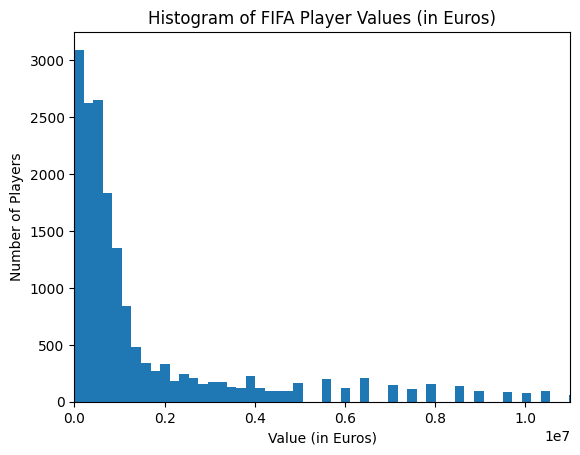

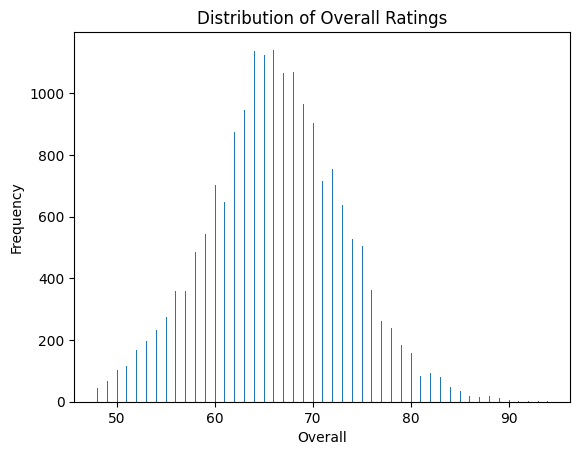

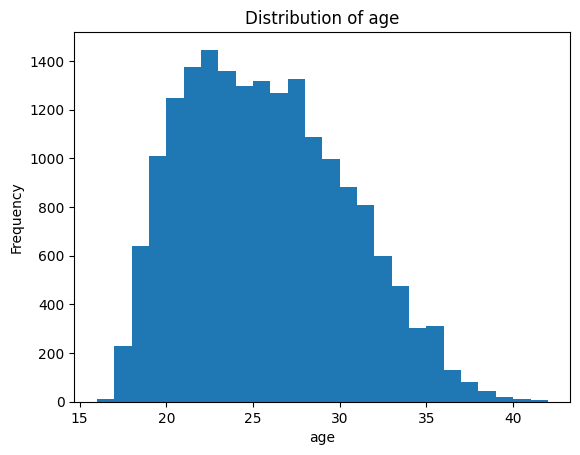

In [79]:
# Create a histogram of player values
plt.hist(df['value_eur'], bins=500)
plt.title('Histogram of FIFA Player Values (in Euros)')
plt.xlabel('Value (in Euros)')
plt.ylabel('Number of Players')
# Set the x-axis limits soo that the resolution makes sense
plt.xlim(0, 1.1e7)
plt.show()

# Now for the distribution of ratings
bin_size = 0.1
plt.hist(df['overall'], bins=int((max(df['overall']) - min(df['overall'])) / bin_size))
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()

# Now for the distribution of age
plt.hist(df['age'], bins=int((max(df['age']) - min(df['age']))))
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

By examining these histograms, we can get a sense of the distributions of these variables in the dataset, which could potentially help us identify predictors of salary. For instance, if we notice that players with higher overall ratings or younger ages tend to have higher salaries, then these variables could be potential predictors of salary. However, to more rigorously determine the strongest predictors and how much variance they explain, we would need to conduct a more comprehensive analysis, such as regression analysis, and calculate measures such as correlation coefficients and R-squared values.

### To address research question two we used the following visualizations. 

#### Average values of each skill attribute for players in different overall rating groups

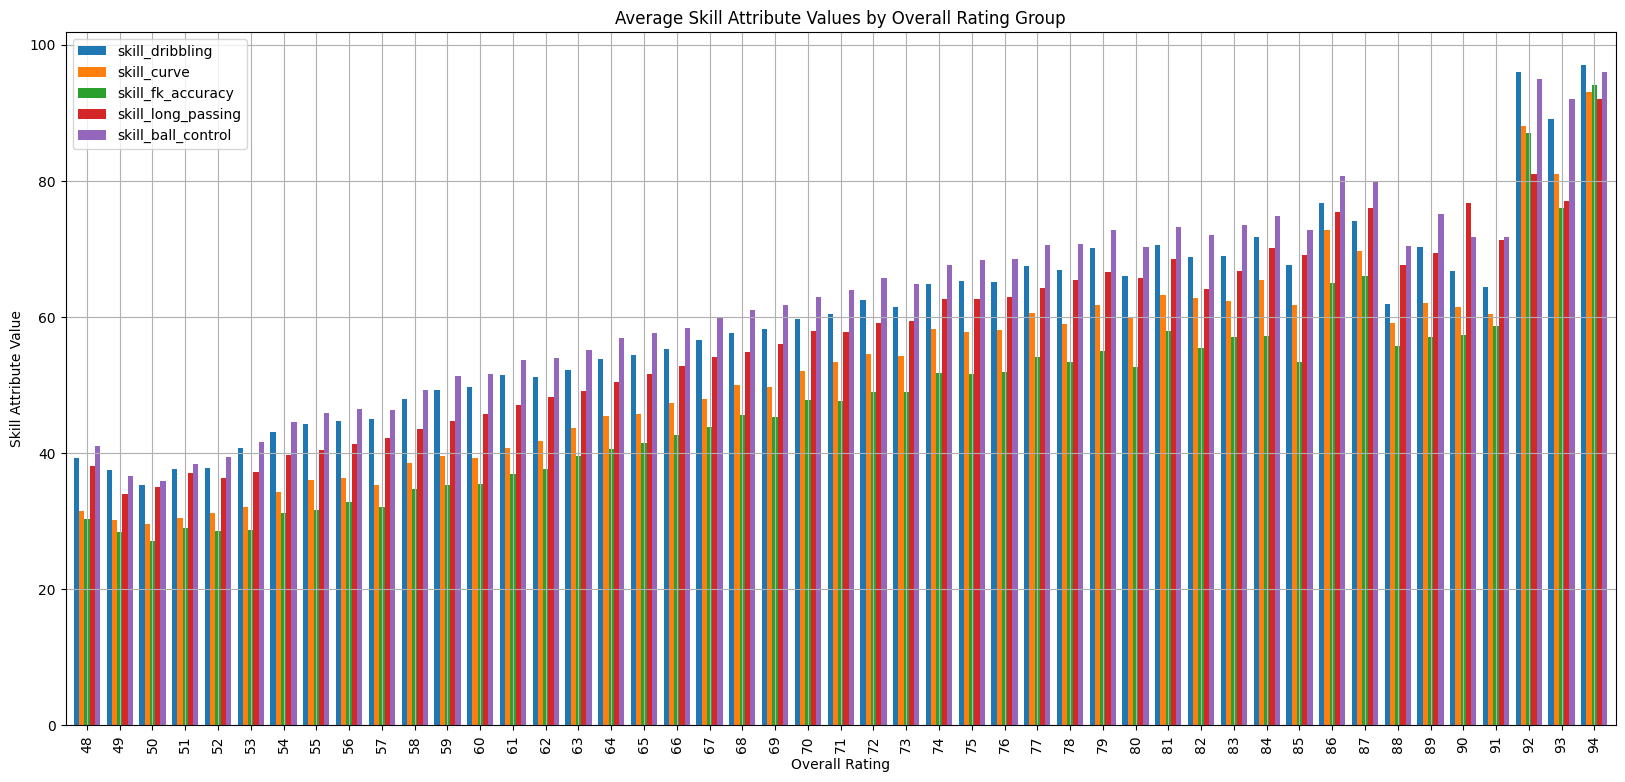

In [80]:
# Group the data by overall rating and calculate the average values for each skill attribute
grouped = df.groupby('overall')[['skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control']].mean()

# Plot the bar chart
ax = grouped.plot(kind='bar', figsize=(20, 9), width=0.8 ,grid=True)

# Set the title and axis labels
ax.set_title('Average Skill Attribute Values by Overall Rating Group')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Skill Attribute Value')

# Show the plot
plt.show()


We grouped the data by overall rating and calculate the average values for each skill attribute. The resulting dataframe is then plotted as a bar chart with each skill attribute represented by a different colored bar.

This visualization can help to answer our second research question of how different skill attributes contribute to a player's overall rating, by showing how the average values of each skill attribute vary across different overall rating groups. It can also help to identify skill attributes that stand out as particularly strong predictors of overall rating, by highlighting bars that are consistently taller or shorter across different overall rating groups.

## The distribution of values for each skill attribute

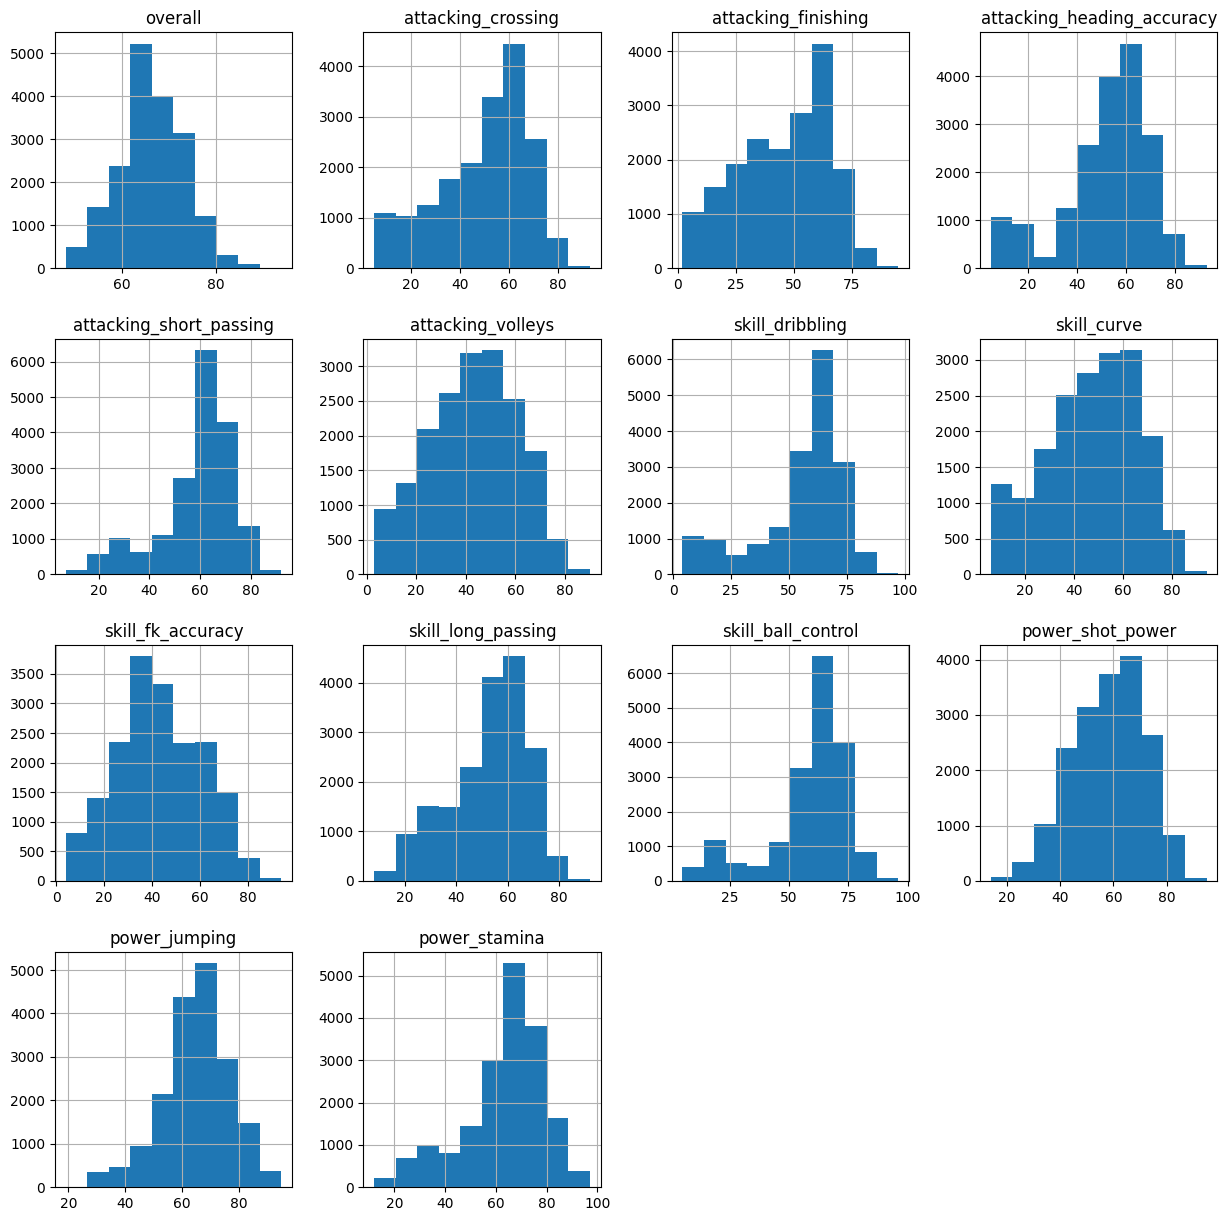

In [81]:
# Select the relevant columns
cols = ['overall', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
        'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 
        'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'power_shot_power', 
        'power_jumping', 'power_stamina']
df = df[cols]

# Generate histograms for each skill attribute
df.hist(bins=10, figsize=(15, 15), grid=True)

# Show the visualizations
plt.show()

The histograms can help us understand the distribution of values for each skill attribute in the FIFA World Cup Player Ratings dataset. By examining the shape of each histogram, we can get a sense of whether the values are skewed to one side or are evenly distributed. This can help us determine if there are any skill attributes that have a particularly strong influence on overall rating.

For example, if we see that the histogram for a skill attribute is skewed to the right, with most values clustered near the lower end of the scale, this could suggest that the attribute is not as important for determining overall rating. Conversely, if we see that the histogram for a skill attribute is more evenly distributed or skewed to the left, with more values clustered at the higher end of the scale, this could suggest that the attribute is a stronger predictor of overall rating.

### To address research question three we used the following visualizations.

### Average Skill Values by Randomly Selected Nationalities

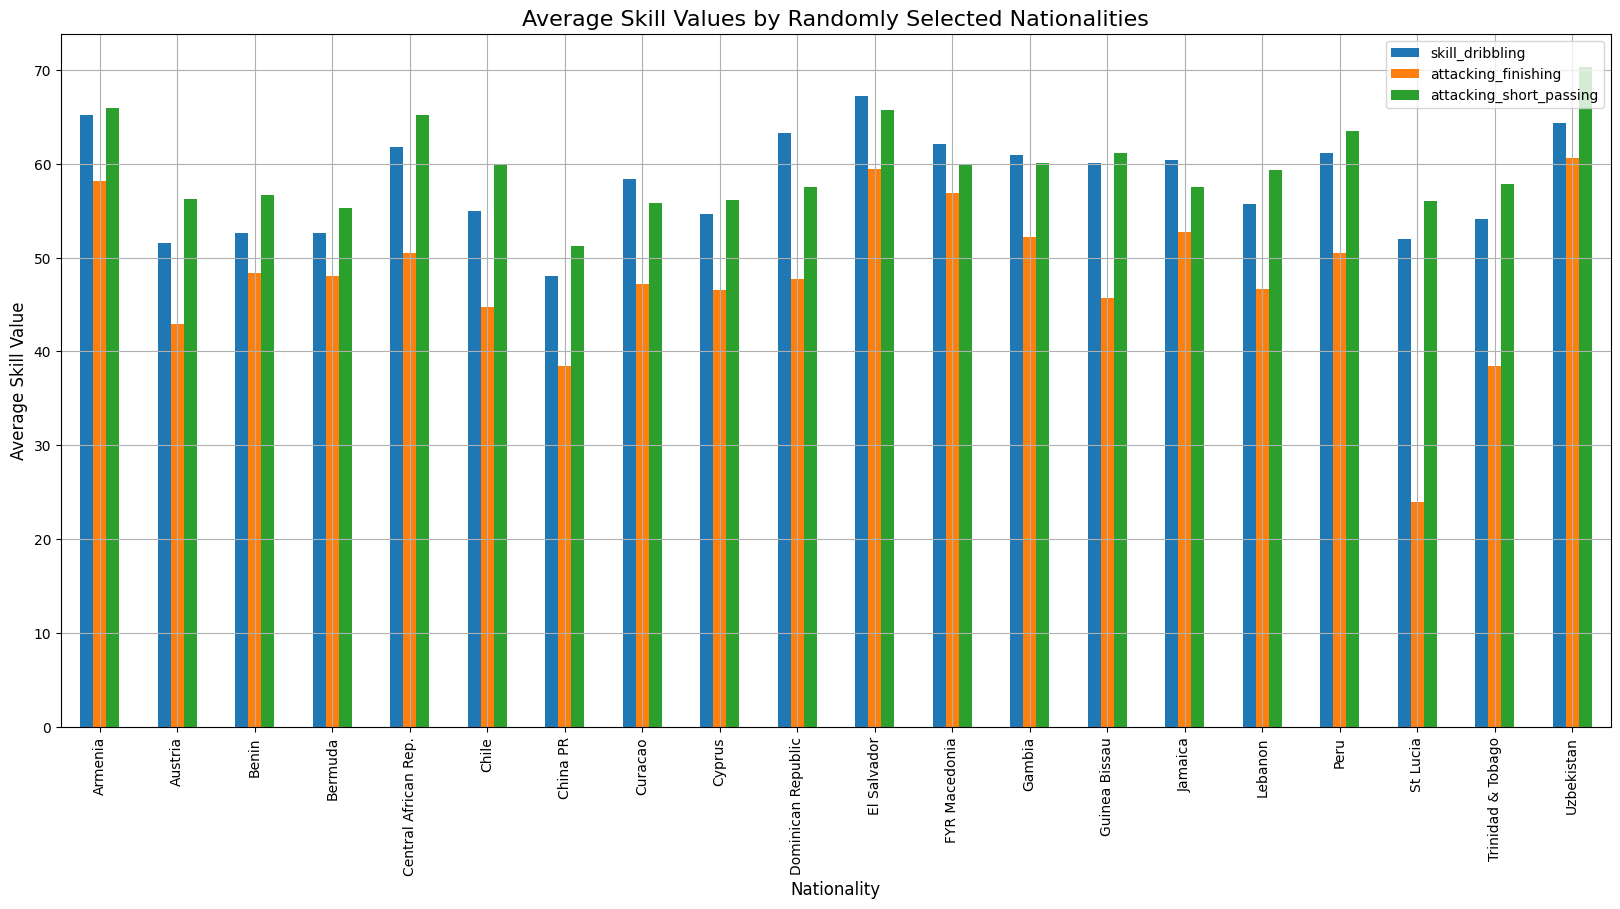

In [82]:
import random

df = pd.read_csv('players_20.csv')

#Create a subset of the data with relevant variables


subset = df[['nationality', 'skill_dribbling', 'attacking_finishing', 'attacking_short_passing']]

#Get a random sample of 20 nationalities
nationalities = random.sample(list(subset['nationality'].unique()), 20)

#Filter the subset to only include the selected nationalities
subset = subset[subset['nationality'].isin(nationalities)]

#Calculate the average values for each skill by nationality
averages = subset.groupby('nationality').mean()

#Plot a bar chart of the average values for each skill
averages.plot(kind='bar', figsize=(20, 9), grid = True)

#Add axis labels and title
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Average Skill Value', fontsize=12)
plt.title('Average Skill Values by Randomly Selected Nationalities', fontsize=16)

plt.show()

This visualization will allow us to compare the average skill values of players from different countries chosen randomely and identify any notable differences in terms of their physical and skill attributes. There are many different nationalities represented in the FIFA World Cup Player Ratings dataset, and analyzing them all individually could lead to an overwhelming amount of data. By randomly selecting 20 nationalities to analyze, we can still get a good sense of how physical and skill attributes vary by country, without being bogged down by too much information. We can further use this visualization to explore any possible correlations between certain skill attributes and the nationality of the players. Overall, this visualization will help us to better understand how the physical and skill attributes of players vary by nationality in the FIFA World Cup Player Ratings dataset.

# **Timeline**


**Week 11:**

Days 1-3: Continue cleaning and preprocess the FIFA World Cup Player Ratings dataset, and explore the data using descriptive statistics and visualizations.

Days 4-5: Conduct preliminary analysis to identify potential predictors for our research questions, and begin building the regression model.


**Week 12:**

Days 1-2 : Continue refining the regression model, including feature selection and parameter tuning.

Days 2-3: Evaluate the model using appropriate metrics, and interpret the results.

Day 4: Create a final report outlining our findings, and prepare a presentation to summarize our results.

Day 5: Submit the final report and prepare for the presentation.


**Week 13:**

Days 1-4: Practice the presentation 

Day 5: Present our findings to the class.

# **Teamwork**

We divided the work for this project as follows:

**Data cleaning and preprocessing**: Both team members will work together to clean and preprocess the data to ensure that it is in a format that can be easily analyzed.
<br>

**Exploratory data analysis**: Both team members will work together to explore the data and create visualizations to identify trends and patterns in the data.
<br>

**Analysis of salary predictors**: One team member will be responsible for analyzing the strongest predictors of salary in the dataset, and how much of the variance in salary can be explained by these predictors.
<br>

**Analysis of skill attributes**: Another team member will be responsible for analyzing how different skill attributes contribute to a player's overall rating in the dataset.
<br>

**Analysis of physical and skill attributes by nationality**: Both team members will work together to analyze how physical and skill attributes vary by randomly chosen nationalities in the dataset, and if there are any notable differences between players from different countries.
<br>

**Report writing and presentation**: Both team members will work together to write up the results of the analysis and create a presentation to present the findings to the class.
<br>
<br>
Throughout the project, both team members will communicate regularly to ensure that the project is progressing smoothly and that both team members are on the same page.